<a href="https://colab.research.google.com/github/cairoegito/Olist_Store-KMeans/blob/main/Olist_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENTENDENDO O PROBLEMA**

A loja Olist Store deseja aprimorar seus serviços para melhorar a experiência do usuário. Mas para isso, precisamos entender o seu público, como ele funciona e seus respectivos gostos. O e-commerce está se desenvolvendo cada vez mais e usaremos as devidas técnicas necessárias para ampliar a satisfação dos usuários

## Bibliotecas

In [7]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

#Machine Learning
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Análise exploratória de Dados

In [8]:
df_geo = pd.read_csv("/content/drive/MyDrive/Olist Store/olist_geolocation_dataset.csv", sep=",")
df_order = pd.read_csv("/content/drive/MyDrive/Olist Store/olist_order_payments_dataset.csv", sep=",")
df_items = pd.read_csv("/content/drive/MyDrive/Olist Store/olist_order_items_dataset.csv", sep=',')


In [9]:
df_geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [10]:
#Observando o tamanho do dataset de geolocalização
Nrow, Ncol = df_geo.shape
print(f'Nosso dataset possui {Nrow} linhas e {Ncol} colunas!')

Nosso dataset possui 1000163 linhas e 5 colunas!


In [11]:
#Checando missings
df_geo.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [12]:
df_geo['geolocation_city'].value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

In [13]:
df_geo['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

Faz mais sentido nos orientarmos pelos pedidos do estado, aja visto que a cidade de São Paulo está duplicada naquela variável

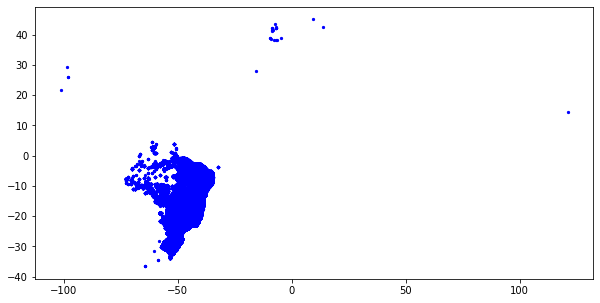

In [14]:
#plotando o gráfico da longitude pela latitude
plt.figure(figsize=(10,5))
plt.scatter(df_geo['geolocation_lng'].values,
            df_geo['geolocation_lat'].values,
            s=5, c='blue')

In [15]:
px.histogram(df_geo, x='geolocation_state')


In [16]:
label_encoder_state = LabelEncoder()

In [17]:
#Tramformando em numérica a variável dos estados
df_geo.iloc[:, 4] = label_encoder_state.fit_transform(df_geo.iloc[:, 4])


In [18]:
df_geo['geolocation_state'].value_counts()

25    404268
10    126336
18    121169
22     61851
17     57859
23     38328
4      36045
8      20139
7      16748
15     16432
6      12986
12     12031
5      11674
13     10853
11     10431
9       7853
14      5538
19      5041
16      4549
1       4183
26      3576
24      3563
20      3478
2       2432
0       1301
3        853
21       646
Name: geolocation_state, dtype: int64

In [19]:
df_geo['sudeste'] = (df_geo['geolocation_state'] == 25) + (df_geo['geolocation_state'] == 10) + (df_geo['geolocation_state'] == 18) + (df_geo['geolocation_state'] == 7)
df_geo['sul'] = (df_geo['geolocation_state'] == 22) + (df_geo['geolocation_state'] == 17) + (df_geo['geolocation_state'] == 23) 
df_geo['centro_oeste'] = (df_geo['geolocation_state'] ==8 ) + (df_geo['geolocation_state'] ==6 ) + (df_geo['geolocation_state'] ==12 ) + (df_geo['geolocation_state'] == 11)
df_geo['nordeste'] = (df_geo['geolocation_state'] == 4) + (df_geo['geolocation_state'] == 15) + (df_geo['geolocation_state'] == 5) + (df_geo['geolocation_state'] == 9) + (df_geo['geolocation_state'] == 14) + (df_geo['geolocation_state'] ==19 ) + (df_geo['geolocation_state'] ==16 ) + (df_geo['geolocation_state'] == 1) + (df_geo['geolocation_state'] == 24)
df_geo['norte'] = (df_geo['geolocation_state'] == 13) + (df_geo['geolocation_state'] == 26) + (df_geo['geolocation_state'] ==20 ) + (df_geo['geolocation_state'] == 2) + (df_geo['geolocation_state'] == 0) + (df_geo['geolocation_state'] ==3 ) + (df_geo['geolocation_state'] == 21) 


In [20]:
df_geo['sudeste'].value_counts()


True     668521
False    331642
Name: sudeste, dtype: int64

In [21]:
df_geo['sul'].value_counts()


False    842125
True     158038
Name: sul, dtype: int64

In [22]:
df_geo['norte'].value_counts()


False    977024
True      23139
Name: norte, dtype: int64

In [23]:
df_geo['nordeste'].value_counts()


False    905285
True      94878
Name: nordeste, dtype: int64

In [24]:
df_geo['centro_oeste'].value_counts()

False    944576
True      55587
Name: centro_oeste, dtype: int64

Notamos que os estados da região Sudeste (SP, RJ, MG, ES) possuem numericamente muito mais pedidos do que outras regiões, ainda mais se comparados com Norte e Nordeste. Apesar do desequílibrio populacional entre as regiões, a discrepância é muito elevada e pode ser intensificada por fatores como poder de compra e/ou logística, tais como prazo de entrega e frete elevados para essas regiões. Apesar de contar com apenas 3 estados a região Sul possui mais pedidos que o Nordeste inteiro, o que nos faz pensar sobre o poder de compra sulista e também se os produtos da linha inverno são mais rentáveis que os do verão. Há também uma concentração muito elevada de pedidos em uma faixa de longitude específica, o que pode concentrar ainda mais dentro de SP regiões que efetuam mais pedidos

In [25]:
df_order.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [26]:
df_order['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

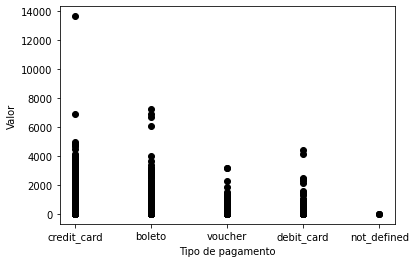

In [27]:
plt.scatter(df_order['payment_type'], df_order['payment_value'], c='k')

plt.xlabel("Tipo de pagamento")
plt.ylabel("Valor")

plt.show()

In [28]:
df_order['payment_installments'].value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

Notamos que a maioria das compras é feita por cartão de crédito, mas que o ticket médio do cartão de crédito e do boleto (2 forma de pagamento mais escolhida) são bem semelhantes. Percebemos também que os clientes optam por poucas parcelas e a maioria das compras são feitas até mesmo à vista, o que nos indica que os clientes podem ter um poder de compra maior a ser explorado pela empresa.

In [29]:
df_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [30]:
x = df_items['freight_value'].mean()
print(f'O valor de frete médio é {x:.2f}')

O valor de frete médio é 19.99


In [31]:
pd.to_datetime(df_items['shipping_limit_date'])


0        2017-09-19 09:45:35
1        2017-05-03 11:05:13
2        2018-01-18 14:48:30
3        2018-08-15 10:10:18
4        2017-02-13 13:57:51
                 ...        
112645   2018-05-02 04:11:01
112646   2018-07-20 04:31:48
112647   2017-10-30 17:14:25
112648   2017-08-21 00:04:32
112649   2018-06-12 17:10:13
Name: shipping_limit_date, Length: 112650, dtype: datetime64[ns]

In [32]:
df_items['shipping_limit_date'].value_counts().head(10)

2017-07-21 18:25:23    21
2018-03-01 02:50:48    21
2017-08-30 14:30:23    20
2017-02-03 21:44:49    15
2017-12-21 02:30:41    15
2017-11-30 10:30:51    15
2018-02-28 11:48:12    14
2018-04-19 02:30:52    13
2018-04-25 22:11:43    13
2018-06-13 17:30:35    13
Name: shipping_limit_date, dtype: int64

Fortalecendo nossa hipótese anterior, dois dos períodos analisados que mais ocorreram vendas foram justamente em julho e agosto de 2017, que equivale a época de inverno na região Sul/Sudeste

## Machine Learning não-supervisionado

In [33]:
df_geo = df_geo.sample(10000)

In [34]:
#Por se tratar de um dataset com não muitas variáveis utilizaremos o Get Dummies para transformação numérica
df_geo = pd.get_dummies(df_geo, drop_first = True )

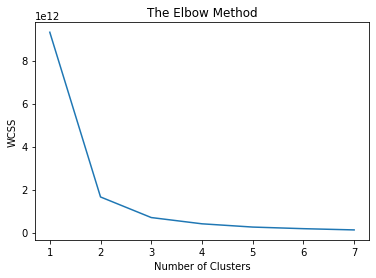

In [35]:
#Usando Elbow Method para encontrar o melhor K possível
wcss = []
for i in range(1,8):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(df_geo)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss, scalex=True)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
#Treinando KMeans para K=2
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)
y = kmeans.fit_predict(df_geo)

In [43]:
df_geo = np.array(df_geo)

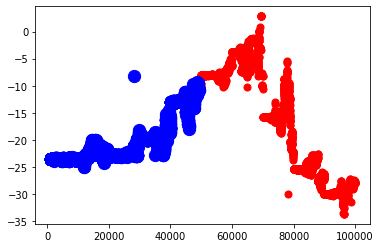

In [44]:
#Visualizando o modelo
plt.scatter(df_geo[y==0,0], df_geo[y==0,1], c='red', s=50)
plt.scatter(df_geo[y==1,0], df_geo[y==1,1], c='blue', s=150)
plt.scatter(df_geo[y==2,0], df_geo[y==2,1], c='orange', s=50)

In [52]:
df_geo = pd.DataFrame(df_geo)

In [45]:
# Silhouette analysis
range_n_clusters = [2]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_geo)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_geo, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.733781718560039


In [61]:
df_order = df_order.sample(5000)

In [59]:
#Por se tratar de um dataset com não muitas variáveis utilizaremos o Get Dummies para transformação numérica
df_order = pd.get_dummies(df_order, drop_first = True )

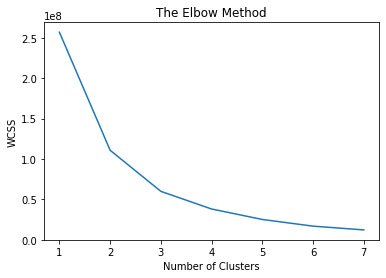

In [67]:
#Usando Elbow Method para encontrar o melhor K possível
wcss = []
for i in range(1,8):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(df_order)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss, scalex=True)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
#Treinando KMeans para K=2
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)
y = kmeans.fit_predict(df_order)

In [69]:
df_order = np.array(df_order)

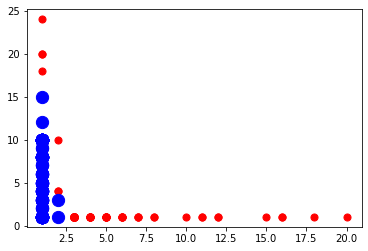

In [70]:
#Visualizando o modelo
plt.scatter(df_order[y==0,0], df_order[y==0,1], c='red', s=50)
plt.scatter(df_order[y==1,0], df_order[y==1,1], c='blue', s=150)
plt.scatter(df_order[y==2,0], df_order[y==2,1], c='orange', s=50)

In [71]:
df_order = pd.DataFrame(df_order)

In [75]:
# Silhouette analysis
range_n_clusters = [2]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_order)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_order, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.8716003641250354


**CONCLUSÃO**

Aqui chegamos a conclusão de que os grupos formados são relevantes para organizarmos possíveis maiores alcances em pedidos mais altos e afins, afinal tivemos um ótimo silhouette score. Vale ressaltar que os grupos de clusters nos dá algumas informações tais como: É importante oferecer produtos mais altos para clientes mais pertos da localidade do envio, assim como um desconto no frete.